In [2]:
import pandas as pd

In [3]:
import numpy as np
import os
import gc #内存管理

In [4]:
file_dir=r'D:\bigdata_project\kaggle_dataset\elo-merchant-category-recommendation'

In [5]:
os.listdir(file_dir)

['Data Dictionary.xlsx',
 'Data_Dictionary.xlsx',
 'historical_transactions.csv',
 'merchants.csv',
 'new_merchant_transactions.csv',
 'sample_submission.csv',
 'test.csv',
 'train.csv']

In [6]:
pd.read_excel(file_dir+r'\Data Dictionary.xlsx',header=2,sheet_name='train')

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [7]:
#查看提交格式
pd.read_csv(file_dir+r'\sample_submission.csv').head()

,card_id,target
0,C_ID_0ab67a22ab,0
1,C_ID_130fd0cbdd,0
2,C_ID_b709037bc5,0
3,C_ID_d27d835a9f,0
4,C_ID_2b5e3df5c2,0


In [8]:
# 查看数据集基本信息
pd.read_csv(file_dir+r'\sample_submission.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   card_id  123623 non-null  object
 1   target   123623 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


# 1、数据读取

In [9]:
train=pd.read_csv(file_dir+r'\train.csv')
test=pd.read_csv(file_dir+r'\test.csv')

In [10]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   first_active_month  123622 non-null  object
 1   card_id             123623 non-null  object
 2   feature_1           123623 non-null  int64 
 3   feature_2           123623 non-null  int64 
 4   feature_3           123623 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 4.7+ MB


In [12]:
train.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target'],
      dtype='object')

In [13]:
train[['feature_1', 'feature_2', 'feature_3',
       'target']].corr()

,feature_1,feature_2,feature_3,target
feature_1,1.000000,-0.130969,0.583092,-0.014251
feature_2,-0.130969,1.000000,0.060925,-0.006242
feature_3,0.583092,0.060925,1.000000,-0.008125
target,-0.014251,-0.006242,-0.008125,1.000000


# 2、数据质量分析

# 2.1数据正确性分析
是否符合基本逻辑，例如cardid是否唯一

In [14]:
(train.shape[0]==train['card_id'].nunique(),test.shape[0]==test['card_id'].nunique())

(True, True)

# 2.2 缺失分析

In [15]:
train.isnull().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

In [16]:
test.isnull().sum()

first_active_month    1
card_id               0
feature_1             0
feature_2             0
feature_3             0
dtype: int64

# 2.3异常值
方法：直方图

In [17]:
train.describe()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


In [18]:
test.describe()

,feature_1,feature_2,feature_3
count,123623.00000,123623.000000,123623.000000
mean,3.10926,1.741796,0.564377
std,1.18911,0.749195,0.495840
min,1.00000,1.000000,0.000000
25%,2.00000,1.000000,0.000000
50%,3.00000,2.000000,1.000000
75%,4.00000,2.000000,1.000000
max,5.00000,3.000000,1.000000


In [22]:
from matplotlib import pyplot as plt

(array([2.2070e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 1.00

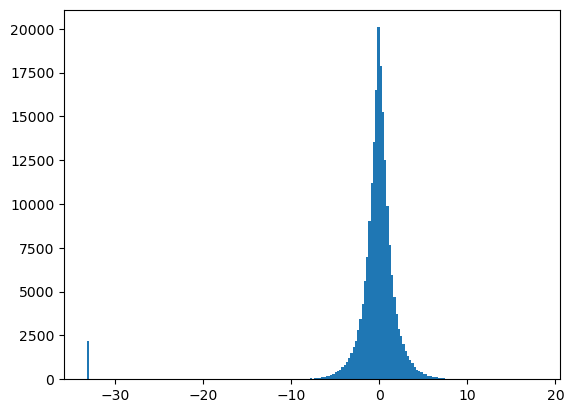

In [23]:
plt.hist(train['target'],bins=200)

In [24]:
(train['target']<-30).sum()

2207

In [25]:
train_target_statistic=train['target'].describe()

In [26]:
min_bound=train_target_statistic['mean']-3*train_target_statistic['std']
max_bound=train_target_statistic['mean']+3*train_target_statistic['std']

In [27]:
(train['target']<min_bound).sum()

2235

In [28]:
(train['target'] > max_bound).sum()

28

# 单变量分析
看看每个变量分布规律

In [31]:
fetures_list=['first_active_month','feature_1', 'feature_2', 'feature_3']
#卡方检验
from scipy.stats import chisquare
for feature in fetures_list:
       x1=train[feature].value_counts()/train.shape[0]
       x2=test[feature].value_counts()/test.shape[0]
       result=chisquare(f_obs=x1, f_exp=x2)
       print(feature,result)

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
8.089175065794438e-06

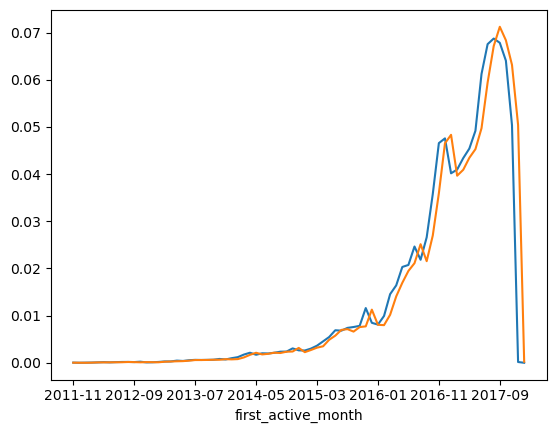

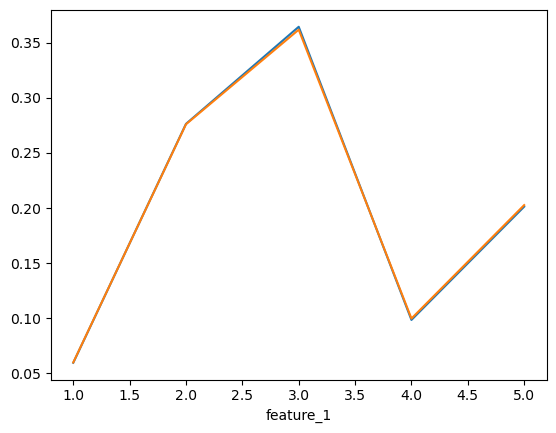

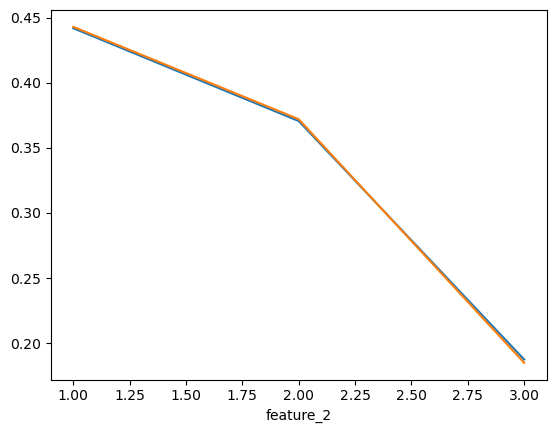

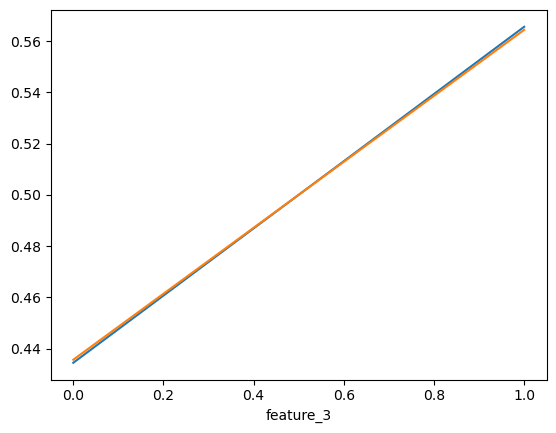

In [32]:
for feature in fetures_list:
       (train[feature].value_counts()/train.shape[0]).sort_index().plot()
       (test[feature].value_counts()/test.shape[0]).sort_index().plot()
       plt.show()

## 多变量联合分布
将变量两两组合，如果单变量一致 但多变量分布不一致 说明存在隐藏变量未观测到影响数据分布

In [33]:
fetures_list

['first_active_month', 'feature_1', 'feature_2', 'feature_3']

In [34]:
train_part=train[fetures_list]
train_part['label']=0
test_part=test[fetures_list]
test_part['label']=1

C:\Users\HUMENGYUAN\AppData\Local\Temp\ipykernel_25440\794694351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_part['label']=0


In [35]:
conbine_data=pd.concat([train_part,test_part])
conbine_data['active_month']=pd.to_datetime(conbine_data["first_active_month"])
conbine_data['year']=conbine_data['active_month'].dt.year
conbine_data['month']=conbine_data['active_month'].dt.month

In [5]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [ ]:
var_train,var_test=train_test_split(conbine_data,test_size=0.2)

In [38]:
xgb=XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    seed=42
)

NameError: name 'XGBClassifier' is not defined

In [39]:
xgb.fit(var_train[['feature_1', 'feature_2', 'feature_3', 'year', 'month']],var_train['label'])

NameError: name 'xgb' is not defined

In [40]:
test_result=xgb.predict(var_test[['feature_1', 'feature_2', 'feature_3', 'year', 'month']])

NameError: name 'xgb' is not defined

In [41]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
precision=accuracy_score(test_result,var_test['label'])
recall=recall_score(test_result,var_test['label'])
f1 = f1_score(test_result, var_test['label'])
print(f'precision:{precision},\nrecall:{recall},\nf1:{f1}')
# 说明无法区分

NameError: name 'test_result' is not defined

规律一致性分析的实际作用
通常我们可以根据规律一致性分析得出以下基本结论:
(1).如果分布非常一致，则说明所有特征均取自同一整体，训练集和测试集规律拥有较高一致性，模型效果上限较高，建模过程中应该更加依靠特征工程方法和模型建模技巧提高最终预测效果;
(2).如果分布不太一致，则说明训练集和测试集规律不太一致，此时模型预测效果上限会受此影响而被限制，并且模型大概率容易过拟合，在实际建过程中可以多考虑使用交叉验证等方式防止过拟合，并且需要注重除了通用特征工程和建模方法外的trick的使用;

# 查看商户信息表

In [208]:
merchant_info=pd.read_csv(file_dir+r'\merchants.csv')

In [209]:
#查看空值情况
merchant_info.isnull().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

In [210]:
# 查看一对多情况
counts=(merchant_info['merchant_id'].value_counts())
merchant=counts[counts>1].index
(merchant_info['merchant_id'].isin(merchant))
merchant_info.loc[merchant_info['merchant_id'].isin(merchant)]

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
53,M_ID_c0b712e11a,35,823,25,-0.057471,-0.057471,N,E,E,1.00,...,1.00,1.000000,1,1.00,1.000000,1,N,231,9,1.0
54,M_ID_c0b712e11a,35,823,25,-0.007896,-0.007896,N,E,E,1.01,...,1.01,1.097119,6,1.20,1.190741,12,N,231,9,1.0
111,M_ID_0039220eb3,35,836,5,-0.057471,-0.057471,Y,E,E,0.66,...,0.66,0.666667,3,0.66,0.666667,3,Y,-1,-1,NaN
112,M_ID_0039220eb3,35,836,5,0.408530,0.408530,Y,C,D,1.17,...,1.17,1.087939,6,1.19,0.997021,12,Y,-1,-1,NaN
3392,M_ID_bd49e37dda,35,692,21,-0.057471,-0.057471,N,E,E,60.09,...,104.82,13.800000,5,104.82,13.800000,5,N,51,16,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333906,M_ID_6464db3b45,35,210,35,-0.057471,-0.057471,Y,A,C,0.79,...,0.63,0.643325,6,0.42,0.402207,12,Y,-1,-1,NaN
334070,M_ID_1802942aaf,35,302,22,-0.047556,-0.047556,N,A,B,0.94,...,0.85,0.868956,6,0.57,0.603051,12,N,96,9,1.0
334071,M_ID_1802942aaf,72963,302,22,-0.047556,-0.047556,N,A,B,0.94,...,0.85,0.868956,6,0.57,0.603051,12,N,96,9,1.0
334072,M_ID_1802942aaf,35,302,22,-0.027726,-0.027726,N,A,C,1.01,...,0.98,1.102663,6,0.97,1.269495,12,N,96,9,1.0


In [211]:
pd.read_excel(file_dir+r'\Data Dictionary.xlsx',sheet_name='merchant',header=2)

,Columns,Description
0,merchant_id,Unique merchant identifier
1,merchant_group_id,Merchant group (anonymized )
2,merchant_category_id,Unique identifier for merchant category (anonymized )
3,subsector_id,Merchant category group (anonymized )
4,numerical_1,anonymized measure
5,numerical_2,anonymized measure
6,category_1,anonymized category
7,most_recent_sales_range,Range of revenue (monetary units) in last active month --> A > B > C > D > E
8,most_recent_purchases_range,Range of quantity of transactions in last active month --> A > B > C > D > E
9,avg_sales_lag3,Monthly average of revenue in last 3 months divided by revenue in last active month


In [212]:
merchant_info.columns

Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2'],
      dtype='object')

In [213]:
# 拆分离散变量和数值变量
continus_feature=['numerical_1', 'numerical_2',
       'avg_sales_lag3', 'avg_purchases_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12']
uncontinus_feature=['merchant_id','merchant_group_id', 'merchant_category_id','subsector_id','category_1','most_recent_sales_range', 'most_recent_purchases_range', 'category_4', 'city_id', 'state_id', 'category_2', 'active_months_lag3', 'active_months_lag6','active_months_lag12']

In [214]:
len(continus_feature)+len(uncontinus_feature)==merchant_info.shape[1]

True

In [215]:
merchant_info[uncontinus_feature].nunique()

merchant_id                    334633
merchant_group_id              109391
merchant_category_id              324
subsector_id                       41
category_1                          2
most_recent_sales_range             5
most_recent_purchases_range         5
category_4                          2
city_id                           271
state_id                           25
category_2                          5
active_months_lag3                  3
active_months_lag6                  6
active_months_lag12                12
dtype: int64

In [216]:
merchant_info[uncontinus_feature].dtypes

merchant_id                     object
merchant_group_id                int64
merchant_category_id             int64
subsector_id                     int64
category_1                      object
most_recent_sales_range         object
most_recent_purchases_range     object
category_4                      object
city_id                          int64
state_id                         int64
category_2                     float64
active_months_lag3               int64
active_months_lag6               int64
active_months_lag12              int64
dtype: object

## 离散变量缺失值处理

In [217]:
merchant_info[uncontinus_feature].isnull().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
active_months_lag3                 0
active_months_lag6                 0
active_months_lag12                0
dtype: int64

In [218]:
uncontinus_feature_info=merchant_info[uncontinus_feature].copy()

In [219]:
uncontinus_feature_info['category_2_fillna']=uncontinus_feature_info['category_2'].fillna(-1)

# 字典编码

In [220]:

def object_encode(se):
    value=se.unique().tolist()
    value=sorted(value)
    return se.map(pd.Series(range(len(value)),index=value)).values

In [221]:
merchant_id_array=uncontinus_feature_info['merchant_id']
uncontinus_feature_info=uncontinus_feature_info.apply(lambda x:object_encode(x),axis=0)
uncontinus_feature_info['merchant_id']=merchant_id_array

In [222]:
# 导包
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
test=merchant_info[uncontinus_feature].fillna(-1)

In [223]:
le=LabelEncoder()
# handle_unknown='use_encoded_value',unknown_value=-1 这俩参数是处理没见过的值
encoder=OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
encode=encoder.fit_transform(test)
encode

array([[1.71754e+05, 8.26500e+03, 2.92000e+02, ..., 2.00000e+00,
        5.00000e+00, 1.10000e+01],
       [1.92525e+05, 3.14700e+03, 3.10000e+02, ..., 2.00000e+00,
        5.00000e+00, 1.10000e+01],
       [3.02174e+05, 4.42000e+02, 2.58000e+02, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       ...,
       [3.16448e+05, 3.40000e+01, 2.12000e+02, ..., 2.00000e+00,
        5.00000e+00, 7.00000e+00],
       [1.90027e+05, 3.40000e+01, 1.89000e+02, ..., 2.00000e+00,
        5.00000e+00, 1.10000e+01],
       [2.68288e+05, 3.40000e+01, 2.27000e+02, ..., 2.00000e+00,
        5.00000e+00, 9.00000e+00]], shape=(334696, 14))

# 连续变量

In [225]:
merchant_info[continus_feature].avg

,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,avg_sales_lag6,avg_purchases_lag6,avg_sales_lag12,avg_purchases_lag12
0,-0.057471,-0.057471,-0.40,9.666667,-2.25,18.666667,-2.32,13.916667
1,-0.057471,-0.057471,-0.72,1.750000,-0.74,1.291667,-0.57,1.687500
2,-0.057471,-0.057471,-82.13,260.000000,-82.13,260.000000,-82.13,260.000000
3,-0.057471,-0.057471,NaN,1.666667,NaN,4.666667,NaN,3.833333
4,-0.057471,-0.057471,NaN,0.500000,NaN,0.361111,NaN,0.347222
...,...,...,...,...,...,...,...,...
334691,3.174788,-0.047556,1.00,1.022618,0.99,1.019505,1.00,1.024796
334692,-0.057471,-0.057471,0.89,0.927684,0.78,0.813473,0.59,0.606765
334693,-0.057471,-0.057471,0.96,0.982957,0.90,0.924769,0.74,0.750763
334694,-0.057471,-0.057471,0.94,0.919558,0.82,0.783000,0.65,0.584000


In [224]:
merchant_info[continus_feature].fillna()

ValueError: Must specify a fill 'value' or 'method'.